In [50]:
#importando bibliotecas 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import sys 
import os
import pandas as pd 
import matplotlib.pyplot as plt
#procurando o arquivo modeling fora do notebook
sys.path.append(os.path.abspath("../src"))
sys.path.append(os.path.abspath("../src/evaluation"))
from modeling import Decisiontree, KNN, RandomForest
from evaluation import plot_confusion_matrix

In [52]:
#importando o dataset modelado 
df = pd.read_csv(r"../data/processed/df_modelo.csv")
df 

,Duracao,Valor,TempoParcelamento,Idade,EmprestimoExistente,SocioEmpresa,Estrangeiro,EMPREGO,ESTADOCIVIL,FIADOR,HABITACAO,HISTORICO,OUTROSFINANCIAMENTOS,PROFISSAO,PROPOSITO,INVESTIMENTOS,Status
0,48,5951,2,22,1,0,0,0,2,2,2,2,2,3,6,2,0
1,12,2096,2,49,1,0,0,1,3,2,2,1,2,2,1,2,1
2,42,7882,2,45,1,0,0,1,3,3,1,2,2,3,2,2,1
3,24,4870,3,53,2,0,0,0,3,2,1,0,2,3,8,2,0
4,36,9055,2,35,1,1,0,0,3,2,1,2,2,2,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1207,4,24,1,0,0,2,2,2,0,2,2,3,8,2,0
996,24,5084,2,42,1,1,0,3,2,2,2,2,2,3,6,4,1
997,18,866,4,25,1,0,0,0,1,3,2,2,2,2,6,2,1
998,6,1238,4,36,1,1,0,4,3,2,2,2,2,0,4,4,1


In [53]:
#Separando x: previsores e y: classe
X = df.drop("Status", axis=1).values
y = df["Status"].values
X

array([[  48, 5951,    2, ...,    3,    6,    2],
       [  12, 2096,    2, ...,    2,    1,    2],
       [  42, 7882,    2, ...,    3,    2,    2],
       ...,
       [  18,  866,    4, ...,    2,    6,    2],
       [   6, 1238,    4, ...,    0,    4,    4],
       [  24, 4712,    4, ...,    0,    0,    4]])

In [54]:
#Dividindo a base de dados em 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

len(X_train), len(X_test), len(y_train), len(y_test)

(700, 300, 700, 300)

In [55]:
#utilizando os modelos 
modelos = {
    "Decision Tree": Decisiontree(),
    "KNN": KNN(),
    "Random Forest": RandomForest()
}

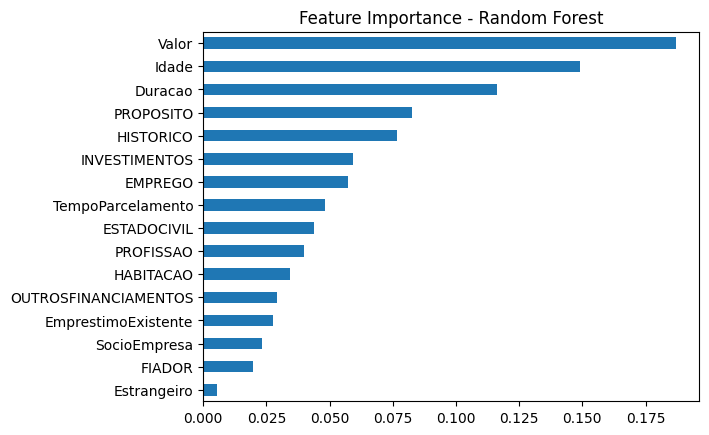

In [56]:
#criação e treinando os modelos 
resultado = {}
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test) 
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    resultado[nome] = [acc, prec, rec]

    if nome == "Random Forest":
        plt.figure()
        pd.Series(modelo.feature_importances_, index=df.drop("Status", axis=1).columns
                  ).sort_values().plot(kind='barh', title=f"Feature Importance - {nome}")
        plt.show()

In [58]:
df_resultados = pd.DataFrame.from_dict(
    resultado, orient='index',
    columns=["Accuracy", "Precision", "Recall"]
)

# Ordena pelo melhor accuracy (ou qualquer métrica que queira priorizar)
df_resultados = df_resultados.sort_values(by="Accuracy", ascending=False)

# Mostra
print(df_resultados)

               Accuracy  Precision    Recall
Random Forest      0.77   0.819672  0.888889
Decision Tree      0.67   0.800000  0.746667
KNN                0.66   0.755187  0.808889


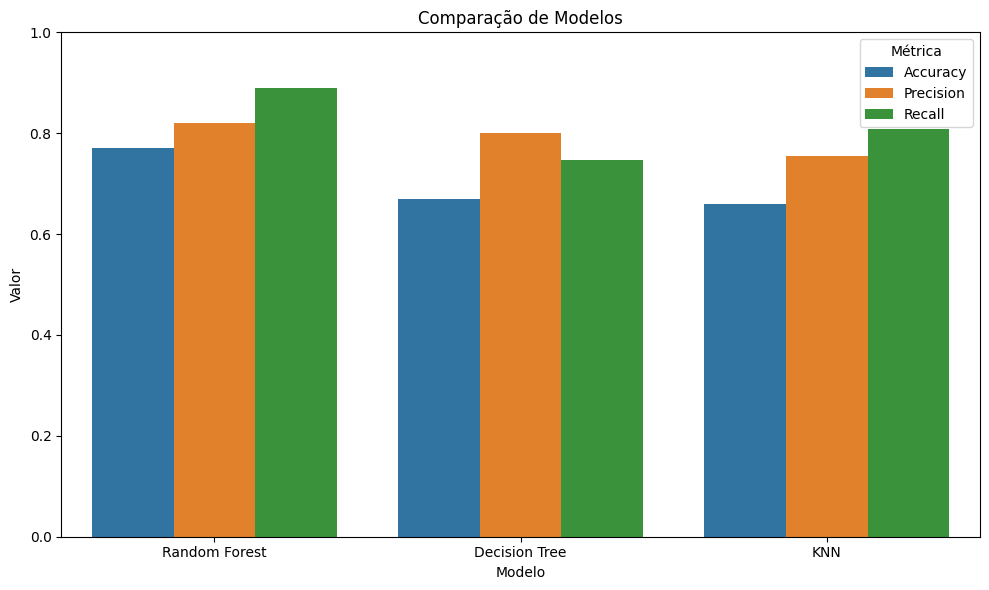

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

df_resultados.reset_index(inplace=True)
df_resultados.rename(columns={"index": "Modelo"}, inplace=True)

df_plot = df_resultados.melt(id_vars="Modelo", var_name="Métrica", value_name="Valor")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x="Modelo", y="Valor", hue="Métrica")
plt.title("Comparação de Modelos")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


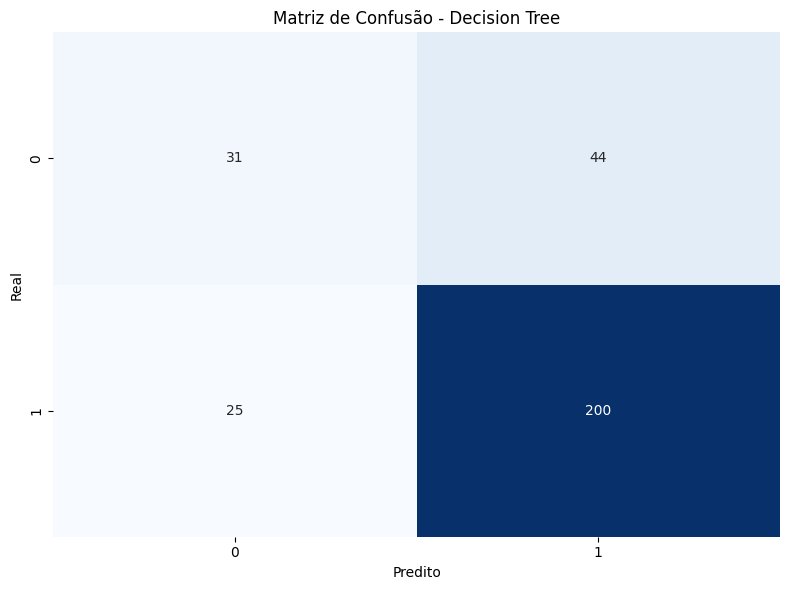

In [60]:
#criando a matriz de confusão 
plot_confusion_matrix(y_test, y_pred, nome_modelo = "Decision Tree")

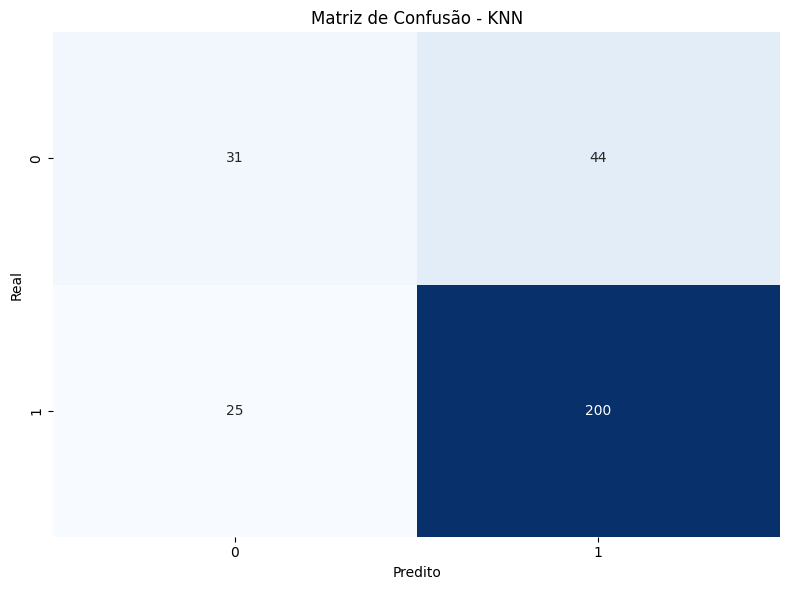

In [61]:
plot_confusion_matrix(y_test, y_pred, nome_modelo = "KNN")

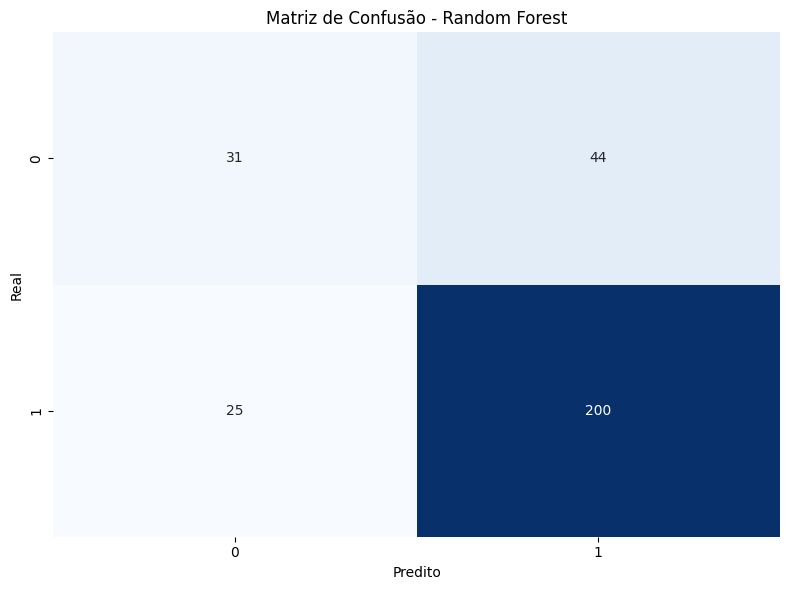

In [62]:
#modelo Random Forest 
plot_confusion_matrix(y_test, y_pred, nome_modelo = "Random Forest")    

In [63]:
import joblib

for nome, modelo in modelos.items():
    if nome == "Random Forest":
        joblib.dump(modelo, r"C:\Users\Daniel Vieira\Desktop\inadiplencia_case\data\models/Random_Forest.pkl")
        print(f"Modelo {nome} salvo com sucesso!")


Modelo Random Forest salvo com sucesso!
